## Steak & Pizza classification By Alan Altonchi
**Day 4 of learning how to use TensorFlow and what Machine Learning is**

Dataset: https://www.kaggle.com/datasets/dansbecker/food-101

This is a **Binary Classification**, the inputs are RGB images, the output is what the model predicts the image to be which is either Pizza or Steak

**Introduction:** Hello, my name is Alan, I am a passionate self-taught programmer that loves learning new things. This is my journey as I'm learning about **Machine Learning** and how to make use of its subfield **Deep Learning**. I will do so by learning how to use **TensorFlow** from scratch.

## Data Augmentation

In [168]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential, layers, optimizers, losses

checkpoint = 'saves/model.h5'
train_dir = "datasets/food_vision/train"
test_dir = "datasets/food_vision/test"
aug_dir = "datasets/food_vision/aug/"

print("Augmented Train Data")
test_aug = ImageDataGenerator(rescale=1/255.)
train_data = test_aug.flow_from_directory(aug_dir,
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode="binary",
                                        shuffle=True,
                                        seed=42)


# train_datagen = ImageDataGenerator(rescale=1/255.,
#                                              rotation_range=15,
#                                              width_shift_range=0.1,
#                                              height_shift_range=0.1,
#                                              shear_range=0.1,
#                                              brightness_range=[0.5, 1.25],
#                                              horizontal_flip=True,
#                                              vertical_flip=True,
#                                              preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
# train_data = train_datagen.flow_from_directory(train_dir,
#                                                              target_size=(224, 224),
#                                                              batch_size=32,
#                                                              class_mode="binary",
#                                                              shuffle=True,
#                                                              seed=42)

print("Non-augmented Test Data")
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary")

val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Augmented Train Data
Found 15546 images belonging to 2 classes.
Non-augmented Test Data
Found 482 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


In [169]:
images, labels = train_data.next()
images_aug, labels_aug = train_data.next()

In [ ]:
from keras.applications import VGG16
from keras import callbacks
weights_path = 'weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(
  weights=weights_path,
  include_top=False,
  input_shape=(224, 224, 3)
)


model = Sequential([
  base_model,
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(1, activation="sigmoid")
])
model.layers[0].trainable = False

model.compile(loss=losses.BinaryCrossentropy(),
                optimizer=optimizers.Adam(),
                metrics=["accuracy"])
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

chkp = callbacks.ModelCheckpoint(checkpoint,monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)

history = model.fit(train_data, 
                        epochs=10, 
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data),
                        callbacks=[chkp])

Text(0.5, 0, 'epochs')

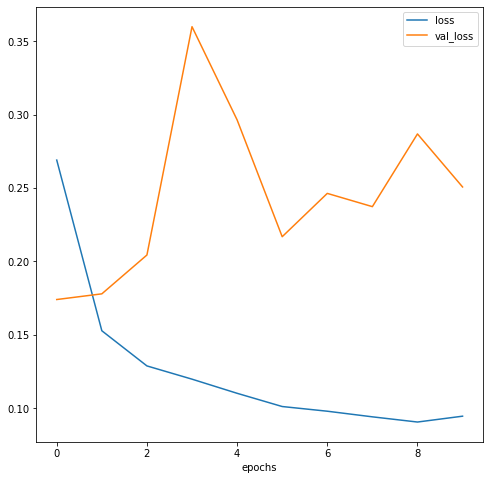

In [171]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

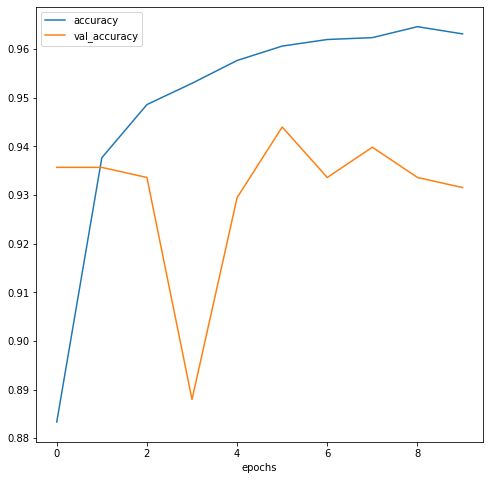

In [172]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.xlabel("epochs")

In [173]:
weights_path = 'weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(
  weights=weights_path,
  include_top=False,
  input_shape=(224, 224, 3)
)


model_best = Sequential([
  base_model,
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(1, activation="sigmoid")
])
model_best.layers[0].trainable = False

model_best.compile(loss=losses.BinaryCrossentropy(),
                optimizer=optimizers.Adam(),
                metrics=["accuracy"])

model_best.load_weights(checkpoint)

In [174]:
model_best.evaluate(val_data)

16/16 [==============================] - 1s 46ms/step - loss: 0.2169 - accuracy: 0.9440


[0.2168647199869156, 0.9439833760261536]

## Run on our own images

In [175]:
from keras.utils import load_img
import matplotlib.pyplot as plt
import os
class_names = ['pizza', 'steak']
def process_image(img):
    image = load_img('datasets\\food_vision\custom\\'+img,
                    target_size=(224, 224))
    plt.imshow(image)
    image = tf.cast(tf.constant(image),tf.float32) / 255.
    image = tf.expand_dims(image,axis=0)
    return image

def predict_image(model, img):
    image = process_image(img)
    pred = model.predict(image, verbose=0)[0][0]
    plt.title(f'{class_names[round(pred)]} ({pred*100 if pred > 0.5 else 100 - pred*100:.2f}%)', fontsize=15)

def run_tests(model):
    plt.figure(figsize=(15,15))
    for i, filename in enumerate(os.listdir("datasets\\food_vision\custom\\")):
       
        plt.subplot(4,4,i+1)
        predict_image(model, filename)
    

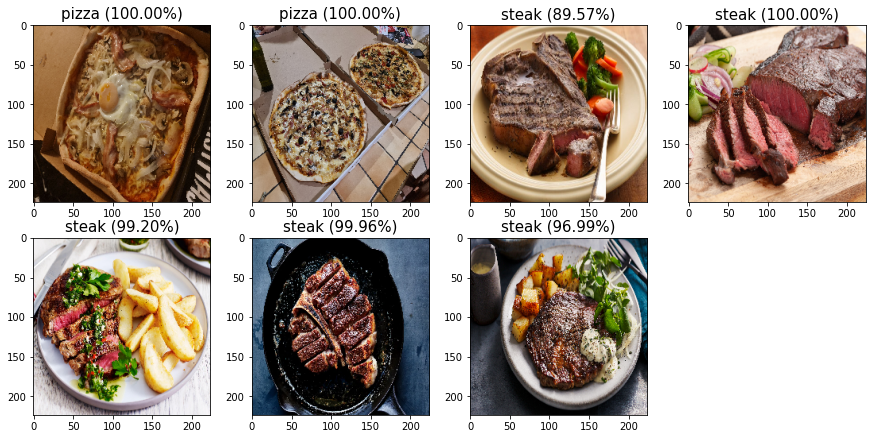

In [178]:
run_tests(model_best)